In [9]:
from itertools import count

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_churn = pd.read_csv('Churn.csv')

In [11]:
df_churn

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [12]:
df_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [13]:
df_churn.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [14]:
df_churn_copy = df_churn.copy()

In [15]:
df_churn_copy

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [16]:
def check_float_values(list_numbers):
    list_count = []
    try:
        
        for num in list_numbers:
            if int(num) != num:
                print(num)
                list_count.append(num)
        return list_count
    except:
        return list_count.append("Warning :)")

In [17]:
list_count = check_float_values(df_churn["Credit_Limit"].unique().tolist()) # один элемент float, не будем менять на int ;)

1438.3


In [18]:
rows = df_churn[df_churn['Credit_Limit'].apply(lambda x: x in list_count)]
len(rows) # а если быть точнее то 507 строчек с "1438.3" 

507

In [19]:
list_count2 = check_float_values(df_churn["Avg_Open_To_Buy"].unique().tolist()) # аналогично, но чуть больше элементов 

1438.3
630.3
700.3
538.3
759.3
413.3
855.3
901.3
576.3
1077.3
959.3
305.3
1132.3
764.3
691.3
441.3
765.3
757.3
210.3
758.3
730.3
736.3
457.3
591.3
943.3
701.3
460.3
790.3
775.3
666.3
1126.3
548.3
510.3
750.3
523.3
436.3
407.3
651.3
728.3
655.3
799.3
742.3
773.3
620.3
574.3
587.3
980.3
578.3
682.3
593.3
450.3
383.3
644.3
692.3
684.3
582.3
380.3
637.3
534.3
699.3
834.3
552.3
862.3
318.3
641.3
212.3
1268.3
622.3
770.3
600.3
903.3
569.3
703.3
624.3
658.3
900.3
894.3
489.3
791.3
683.3
627.3
926.3
313.3
241.3
716.3
285.3
224.3
839.3
648.3
832.3
768.3
673.3
532.3
717.3
796.3
435.3
928.3
679.3
561.3
856.3
751.3
916.3
358.3
777.3
735.3
382.3
461.3
215.3
604.3
330.3
983.3
713.3
626.3
555.3
756.3
772.3
579.3
528.3
667.3
802.3
237.3
749.3
452.3
562.3
448.3
583.3
827.3
688.3
712.3
1111.3
665.3
347.3
220.3
650.3
530.3
525.3
698.3
708.3
947.3
695.3
255.3
472.3
575.3
803.3
652.3
897.3
378.3
693.3
797.3
808.3
473.3
837.3
546.3
408.3
619.3
129.3
970.3
269.3
544.3
276.3
297.3
720.3
752.3
725.3


In [20]:
rows = df_churn[df_churn['Avg_Open_To_Buy'].apply(lambda x: x in list_count2)]
len(rows) # вывод у одних и тех же строчек float, в теории 

507

In [21]:
dfnan = df_churn[df_churn.isnull().any(axis=1)]
dfnan # нет пустых значений но в инфо это и так есть)

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [22]:
dfzero = df_churn[df_churn == 0]
print(dfzero)

      churn  Customer_Age Gender  Dependent_count Education_Level  \
0       NaN           NaN    NaN              NaN             NaN   
1       NaN           NaN    NaN              NaN             NaN   
2       NaN           NaN    NaN              NaN             NaN   
3       NaN           NaN    NaN              NaN             NaN   
4       NaN           NaN    NaN              NaN             NaN   
...     ...           ...    ...              ...             ...   
10122   NaN           NaN    NaN              NaN             NaN   
10123   NaN           NaN    NaN              NaN             NaN   
10124   NaN           NaN    NaN              NaN             NaN   
10125   NaN           NaN    NaN              NaN             NaN   
10126   NaN           NaN    NaN              NaN             NaN   

      Marital_Status Income_Category Card_Category  Months_on_book  \
0                NaN             NaN           NaN             NaN   
1                NaN           

In [23]:
num_duplicates = df_churn.duplicated().sum() # нет дубликатов

print("Number of duplicated values:", num_duplicates)

Number of duplicated values: 0


<Axes: >

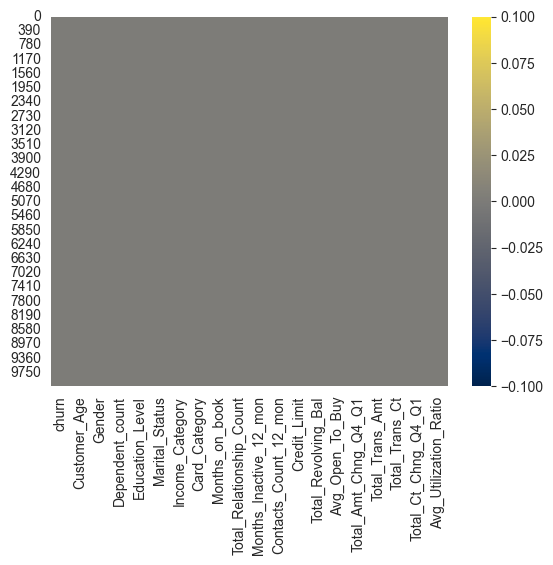

In [24]:
sns.heatmap(df_churn.isnull(),cmap='cividis')

In [25]:
df_num = df_churn.select_dtypes(exclude=['object'])
df_num.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [26]:
outlier_cols = []

for column in df_num.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = df_num[column].quantile(0.25)
    Q3 = df_num[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on the IQR
    outliers = (df_num[column] < Q1 - 1.5 * IQR) | (df_num[column] > Q3 + 1.5 * IQR)

    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

# Print columns with outliers
print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Customer_Age', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


In [27]:
def box_plot(df):
    if type(df) is type(pd.Series({1: "1"})):
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
        sns.boxplot(x=df, color="purple")
        plt.tight_layout()
        plt.show()
    else:
        list_col = []
        for columns in df:
            list_col.append(columns)
        count = 1
        while True:
            if count * 5 > len(list_col):
                small_df = df[list_col[(count-1)*5:len(list_col)]]
            else:
                small_df = df[list_col[(count-1)*5:count*5]]
                
            fig, axes = plt.subplots(nrows=1, ncols=len(small_df.columns), figsize=(15, 5))
            # Create box plots for each column
            for i, column in enumerate(small_df.columns):
                sns.boxplot(x=small_df[column], ax=axes[i], color="purple")
                axes[i].set_title(f'Box Plot for {column}')
                
            if count * 5 >= len(list_col):
                break
            count += 1
            plt.tight_layout()
            plt.show()

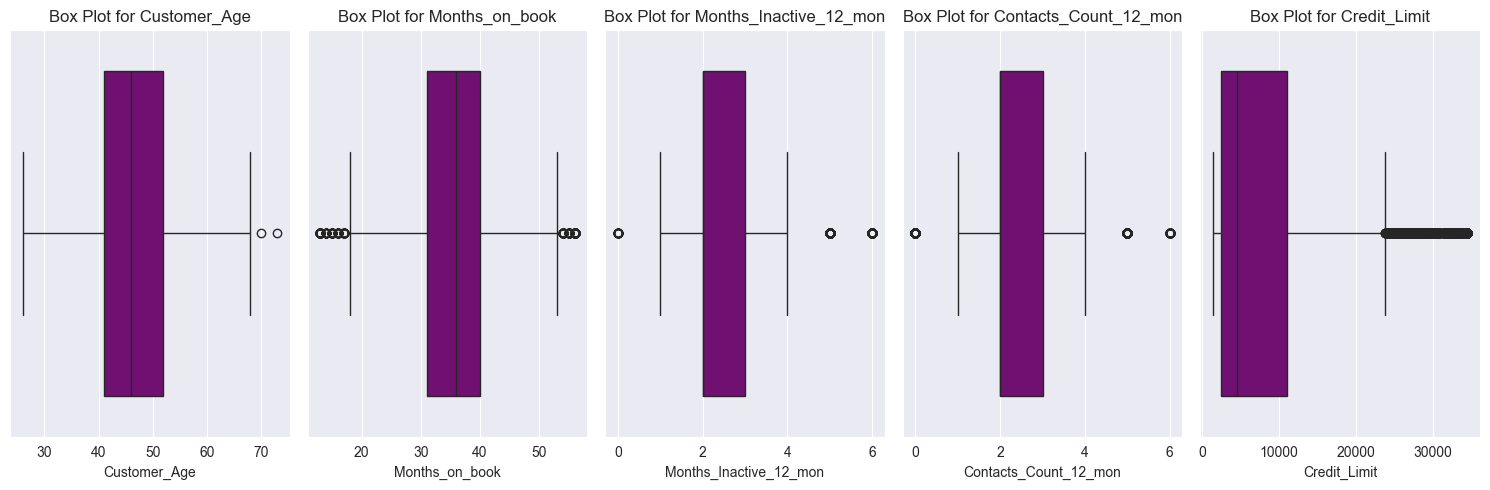

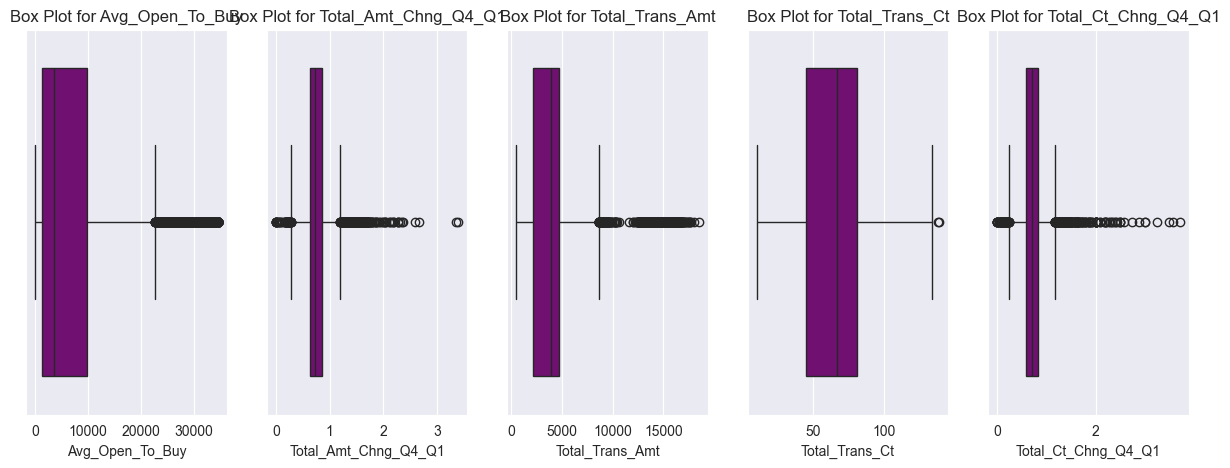

In [28]:
box_plot(df_num[outlier_cols])
# мы видим что есть выбросы, но они выглядят допустимо

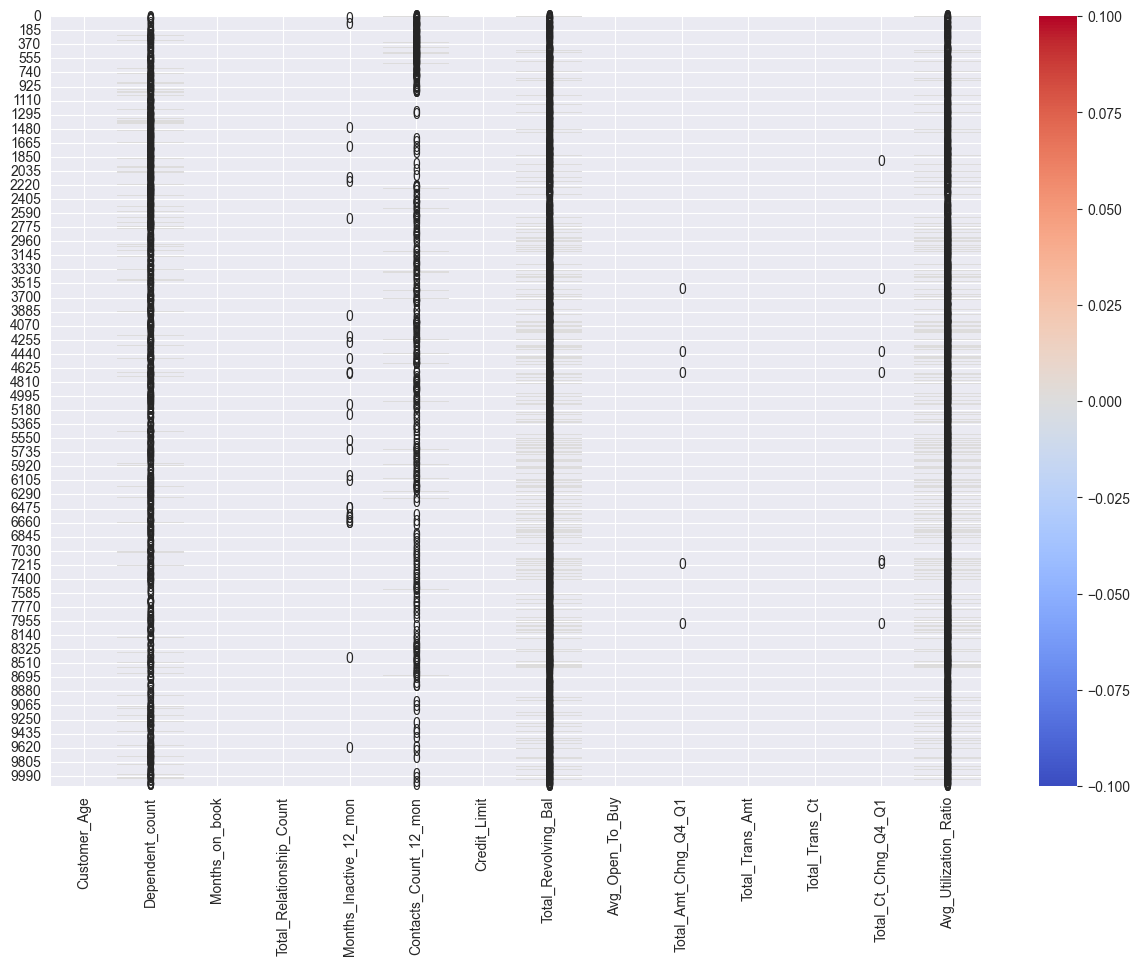

In [29]:
plt.figure(figsize = (15,10))  
sns.heatmap(df_num, cmap="coolwarm", mask=df_num != 0, annot=True,color = "purple") # выделяем нули
plt.show()

In [30]:
def mean_graphic(df,x_inp,y_inp): # ввод df и наименование колонок поиска и группировки
    group_df = df.groupby(x_inp)[y_inp].mean().reset_index()
    plt.figure(figsize=(15, 6))
    sns.barplot(x=x_inp, y=y_inp, data=group_df,color = "purple")
    plt.xlabel(x_inp)
    plt.ylabel(y_inp)
    plt.xticks(rotation=90)
    
    plt.show()

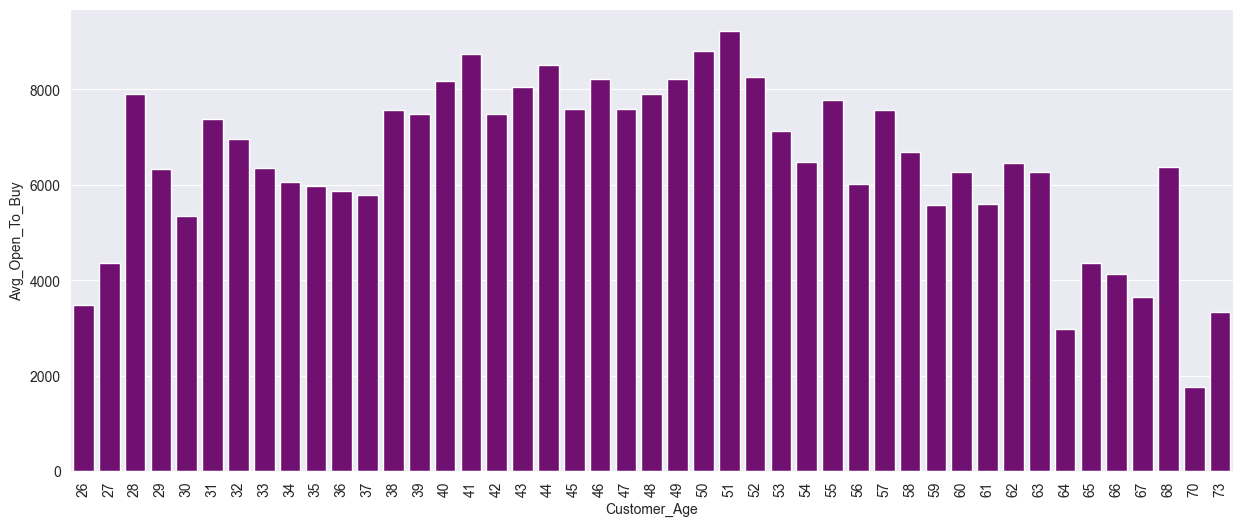

In [31]:
mean_graphic(df_churn,"Customer_Age","Avg_Open_To_Buy")

In [32]:
corr = df_churn['Credit_Limit'].corr(df_churn['Total_Trans_Amt'])
print(f"Correlation between Credit_Limit and Total_Trans_Amt is: {corr:.3f}")

Correlation between Credit_Limit and Total_Trans_Amt is: 0.172


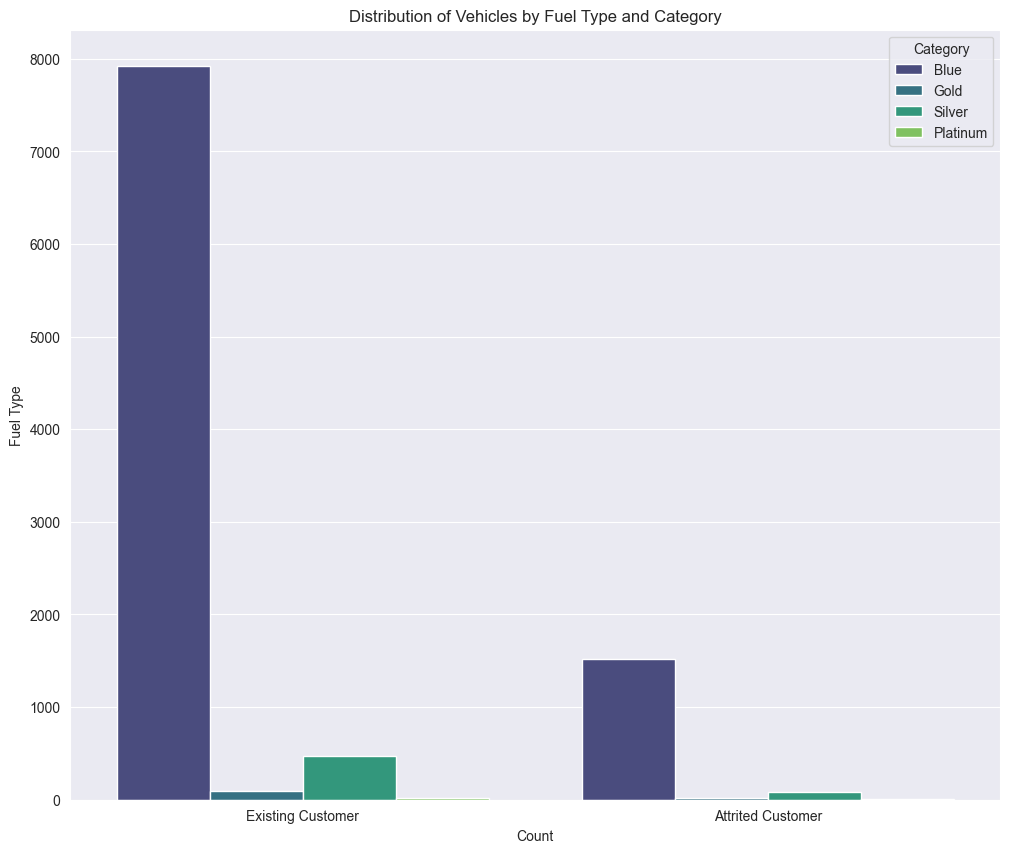

In [33]:
plt.figure(figsize=(12, 10))
sns.countplot(x='churn', hue='Card_Category', data=df_churn, palette='viridis',color="purple")
plt.ylabel('Fuel Type')
plt.xlabel('Count')
plt.title('Distribution of Vehicles by Fuel Type and Category')
plt.legend(title='Category')

plt.show()

In [34]:
# for line in df_churn_copy: # я посмотрел все графики странных вещей нет)
#     for col in df_churn_copy:
#         try:
#             mean_graphic(df_churn_copy,line,col)
#         except:
#             pass

In [35]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df_churn.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df_churn[categorical_columns])
df_churn[categorical_columns] = encoded_data.astype(int)
df_churn.head()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<Axes: >

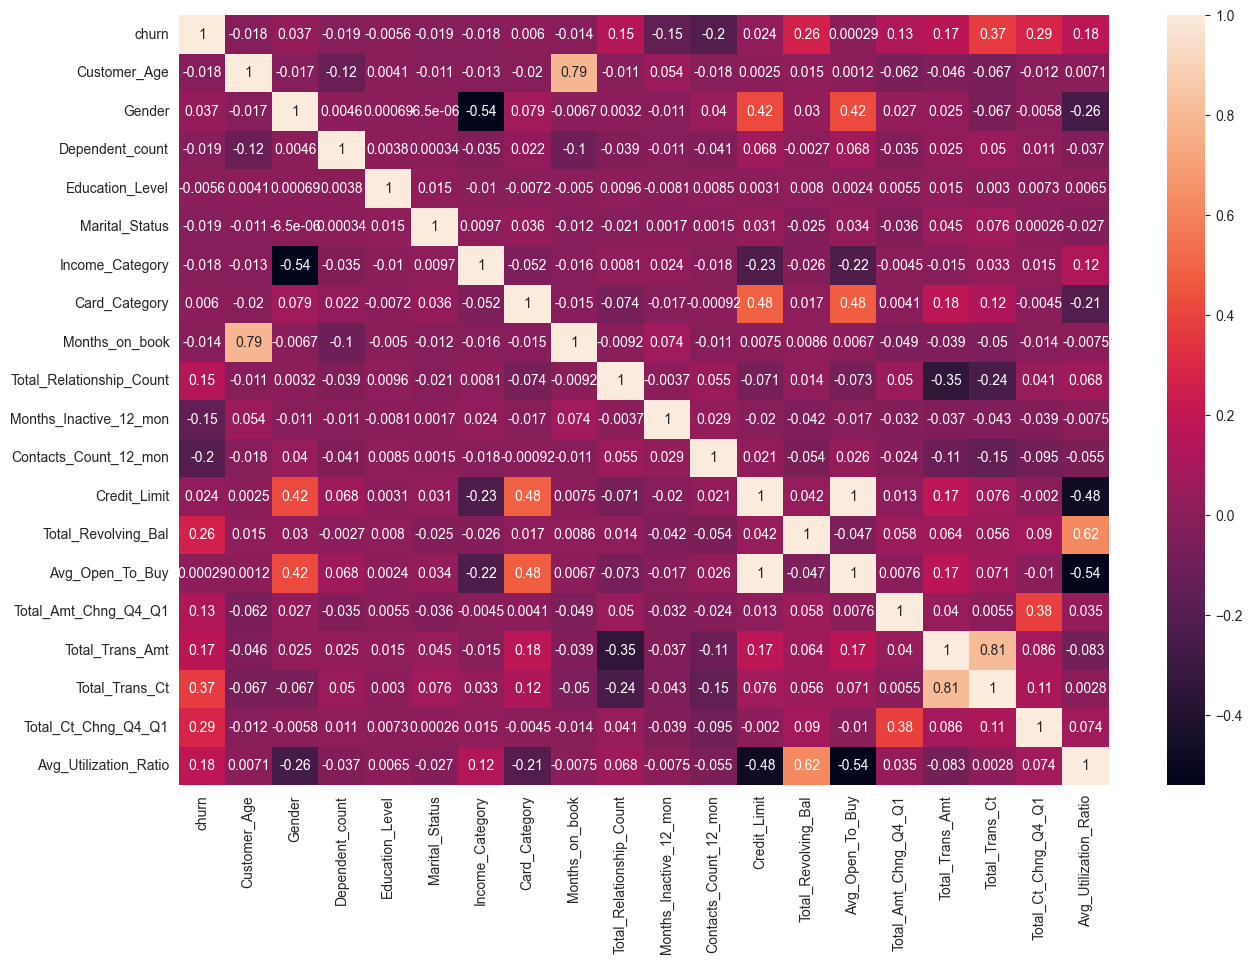

In [36]:
plt.figure(figsize = (15,10))  
sns.heatmap(df_churn.corr(),annot=True,color = "purple")

In [37]:
# Из проанализированной базы, я могу сделать вывод, что вы скинули нам готовую базу, но это не точно 

In [38]:
df_churn.head()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [39]:
X = df_churn.drop(columns='churn')
y = df_churn.churn

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler # масштабируем дынные до единичного отрезка
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

<Axes: >

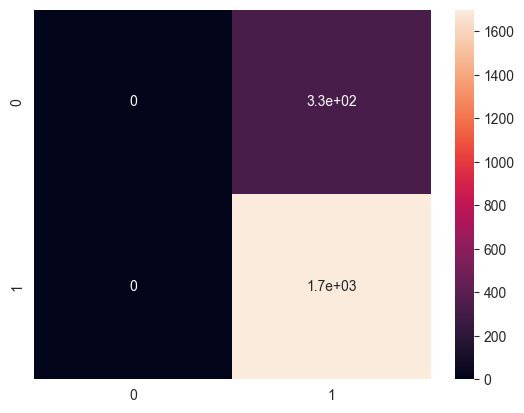

In [43]:
from sklearn.dummy import DummyClassifier 
# начнем разбор с самого интересного классификатора, по моему мнению). Довольно неплохие значения классификации для первого классификатора в рассмотрении 
dc_mf = DummyClassifier(strategy="most_frequent") 
dc_mf.fit(X_train, y_train)


y_true = y_test 
y_pred = dc_mf.predict(X_test) 
dc_mf_tn, dc_mf_fp, dc_mf_fn, dc_mf_tp = confusion_matrix(y_true, y_pred, labels = [0, 1]).ravel()
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
# 1 - текущий (Existing) 0 - ушедший (Attrited)

In [44]:
print(classification_report(y_true, y_pred))
# Но мы можем увидеть, что угадывание ~ 17/20 - неплохо) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       327
           1       0.84      1.00      0.91      1699

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.76      2026



/Users/egoglev/PycharmProjects/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/egoglev/PycharmProjects/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/egoglev/PycharmProjects/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

#### Далее пойдут остальные графики можно посмотреть их по отдельности 

<Axes: >

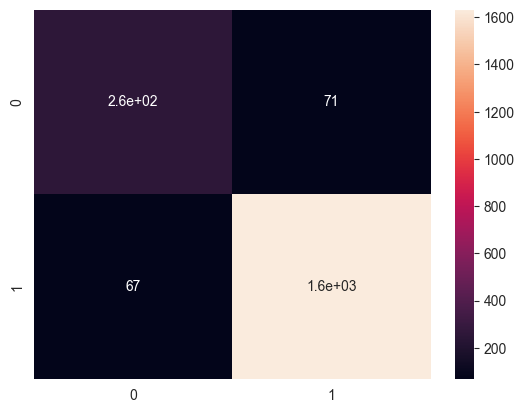

In [45]:
from sklearn.tree import DecisionTreeClassifier 
# Переходим к чуть более интересному классификатору  
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)       

y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
# 1 - текущий (Existing) 0 - ушедший (Attrited)

In [46]:
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.78      0.79       327
           1       0.96      0.96      0.96      1699

    accuracy                           0.93      2026
   macro avg       0.88      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026



<Axes: >

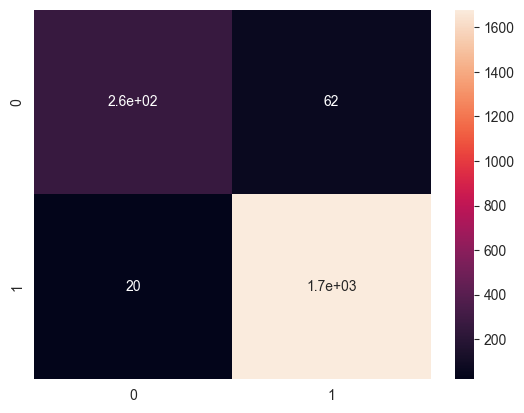

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)       
rfc.fit(X_train, y_train)       
y_true = y_test       
y_pred = rfc.predict(X_test)
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
# 1 - текущий (Existing) 0 - ушедший (Attrited)

In [48]:
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.81      0.87       327
           1       0.96      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



#### Классификационный вывод

По проанализированным классификациям, можно сделать вывод, что HistGradientBoostingClassifier равномернее и лучше остальных распределяет данные.
Но все плохо распределяют ушедших клиентов